In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Load data
df = pd.read_csv('breast-cancer-dataset.csv')
df.head()

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [3]:
df=df.rename(columns={'Tumor Size (cm)':'TumorSize','Inv-Nodes':'INV','Diagnosis Result':'Result','Breast Quadrant':'BreastQuadrant'})
df.head()

,S/N,Year,Age,Menopause,TumorSize,INV,Breast,Metastasis,BreastQuadrant,History,Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   S/N             213 non-null    int64 
 1   Year            213 non-null    object
 2   Age             213 non-null    int64 
 3   Menopause       213 non-null    int64 
 4   TumorSize       213 non-null    object
 5   INV             213 non-null    object
 6   Breast          213 non-null    object
 7   Metastasis      213 non-null    object
 8   BreastQuadrant  213 non-null    object
 9   History         213 non-null    object
 10  Result          213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [5]:
df.isnull().sum()

S/N               0
Year              0
Age               0
Menopause         0
TumorSize         0
INV               0
Breast            0
Metastasis        0
BreastQuadrant    0
History           0
Result            0
dtype: int64

In [6]:
# Clean data
df.replace('#', np.nan, inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0).astype(int)
df['TumorSize'] = pd.to_numeric(df['TumorSize'], errors='coerce').fillna(0).astype(int)
df['INV'] = pd.to_numeric(df['INV'], errors='coerce').fillna(0).astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
df['Metastasis'] = pd.to_numeric(df['Metastasis'], errors='coerce').fillna(0).astype(int)
df['History'] = pd.to_numeric(df['History'], errors='coerce').fillna(0).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   S/N             213 non-null    int64 
 1   Year            213 non-null    int64 
 2   Age             213 non-null    int64 
 3   Menopause       213 non-null    int64 
 4   TumorSize       213 non-null    int64 
 5   INV             213 non-null    int64 
 6   Breast          207 non-null    object
 7   Metastasis      213 non-null    int64 
 8   BreastQuadrant  211 non-null    object
 9   History         213 non-null    int64 
 10  Result          213 non-null    object
dtypes: int64(8), object(3)
memory usage: 18.4+ KB


In [8]:
# Impute missing values
numerical_cols = ['Age', 'Menopause', 'TumorSize', 'INV', 'Metastasis', 'History']
categorical_cols = ['Breast', 'BreastQuadrant', 'Result']

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df[col] = imputer_num.fit_transform(df[[col]]).ravel()
    
for col in categorical_cols:
    df[col] = imputer_cat.fit_transform(df[[col]]).ravel()

In [9]:
label_encoders = {}
# categorical_cols = ['Breast', 'BreastQuadrant', 'Result']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for future use

In [10]:
for col, le in label_encoders.items():
    print(f"Encoding for column: {col}")
    for class_, encoded_value in zip(le.classes_, range(len(le.classes_))):
        print(f"{encoded_value}: {class_}")
    print("\n")

Encoding for column: Breast
0: Left
1: Right


Encoding for column: BreastQuadrant
0: Lower inner
1: Lower outer
2: Upper inner
3: Upper outer
4: Upper outer 


Encoding for column: Result
0: Benign
1: Malignant




## Exploratory Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

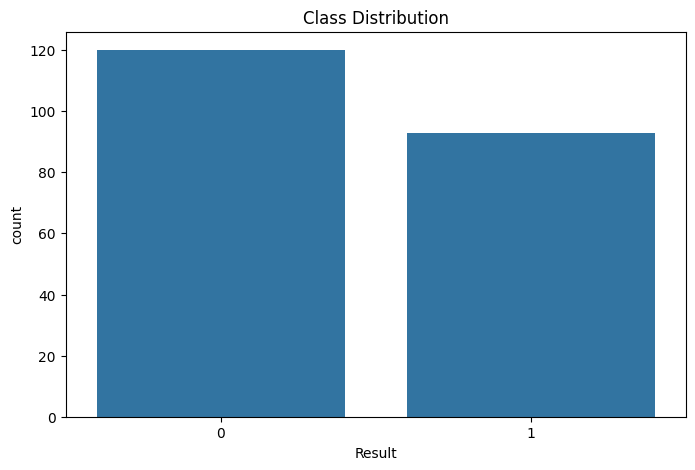

In [12]:
# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Result', data=df)
plt.title('Class Distribution')
plt.show()

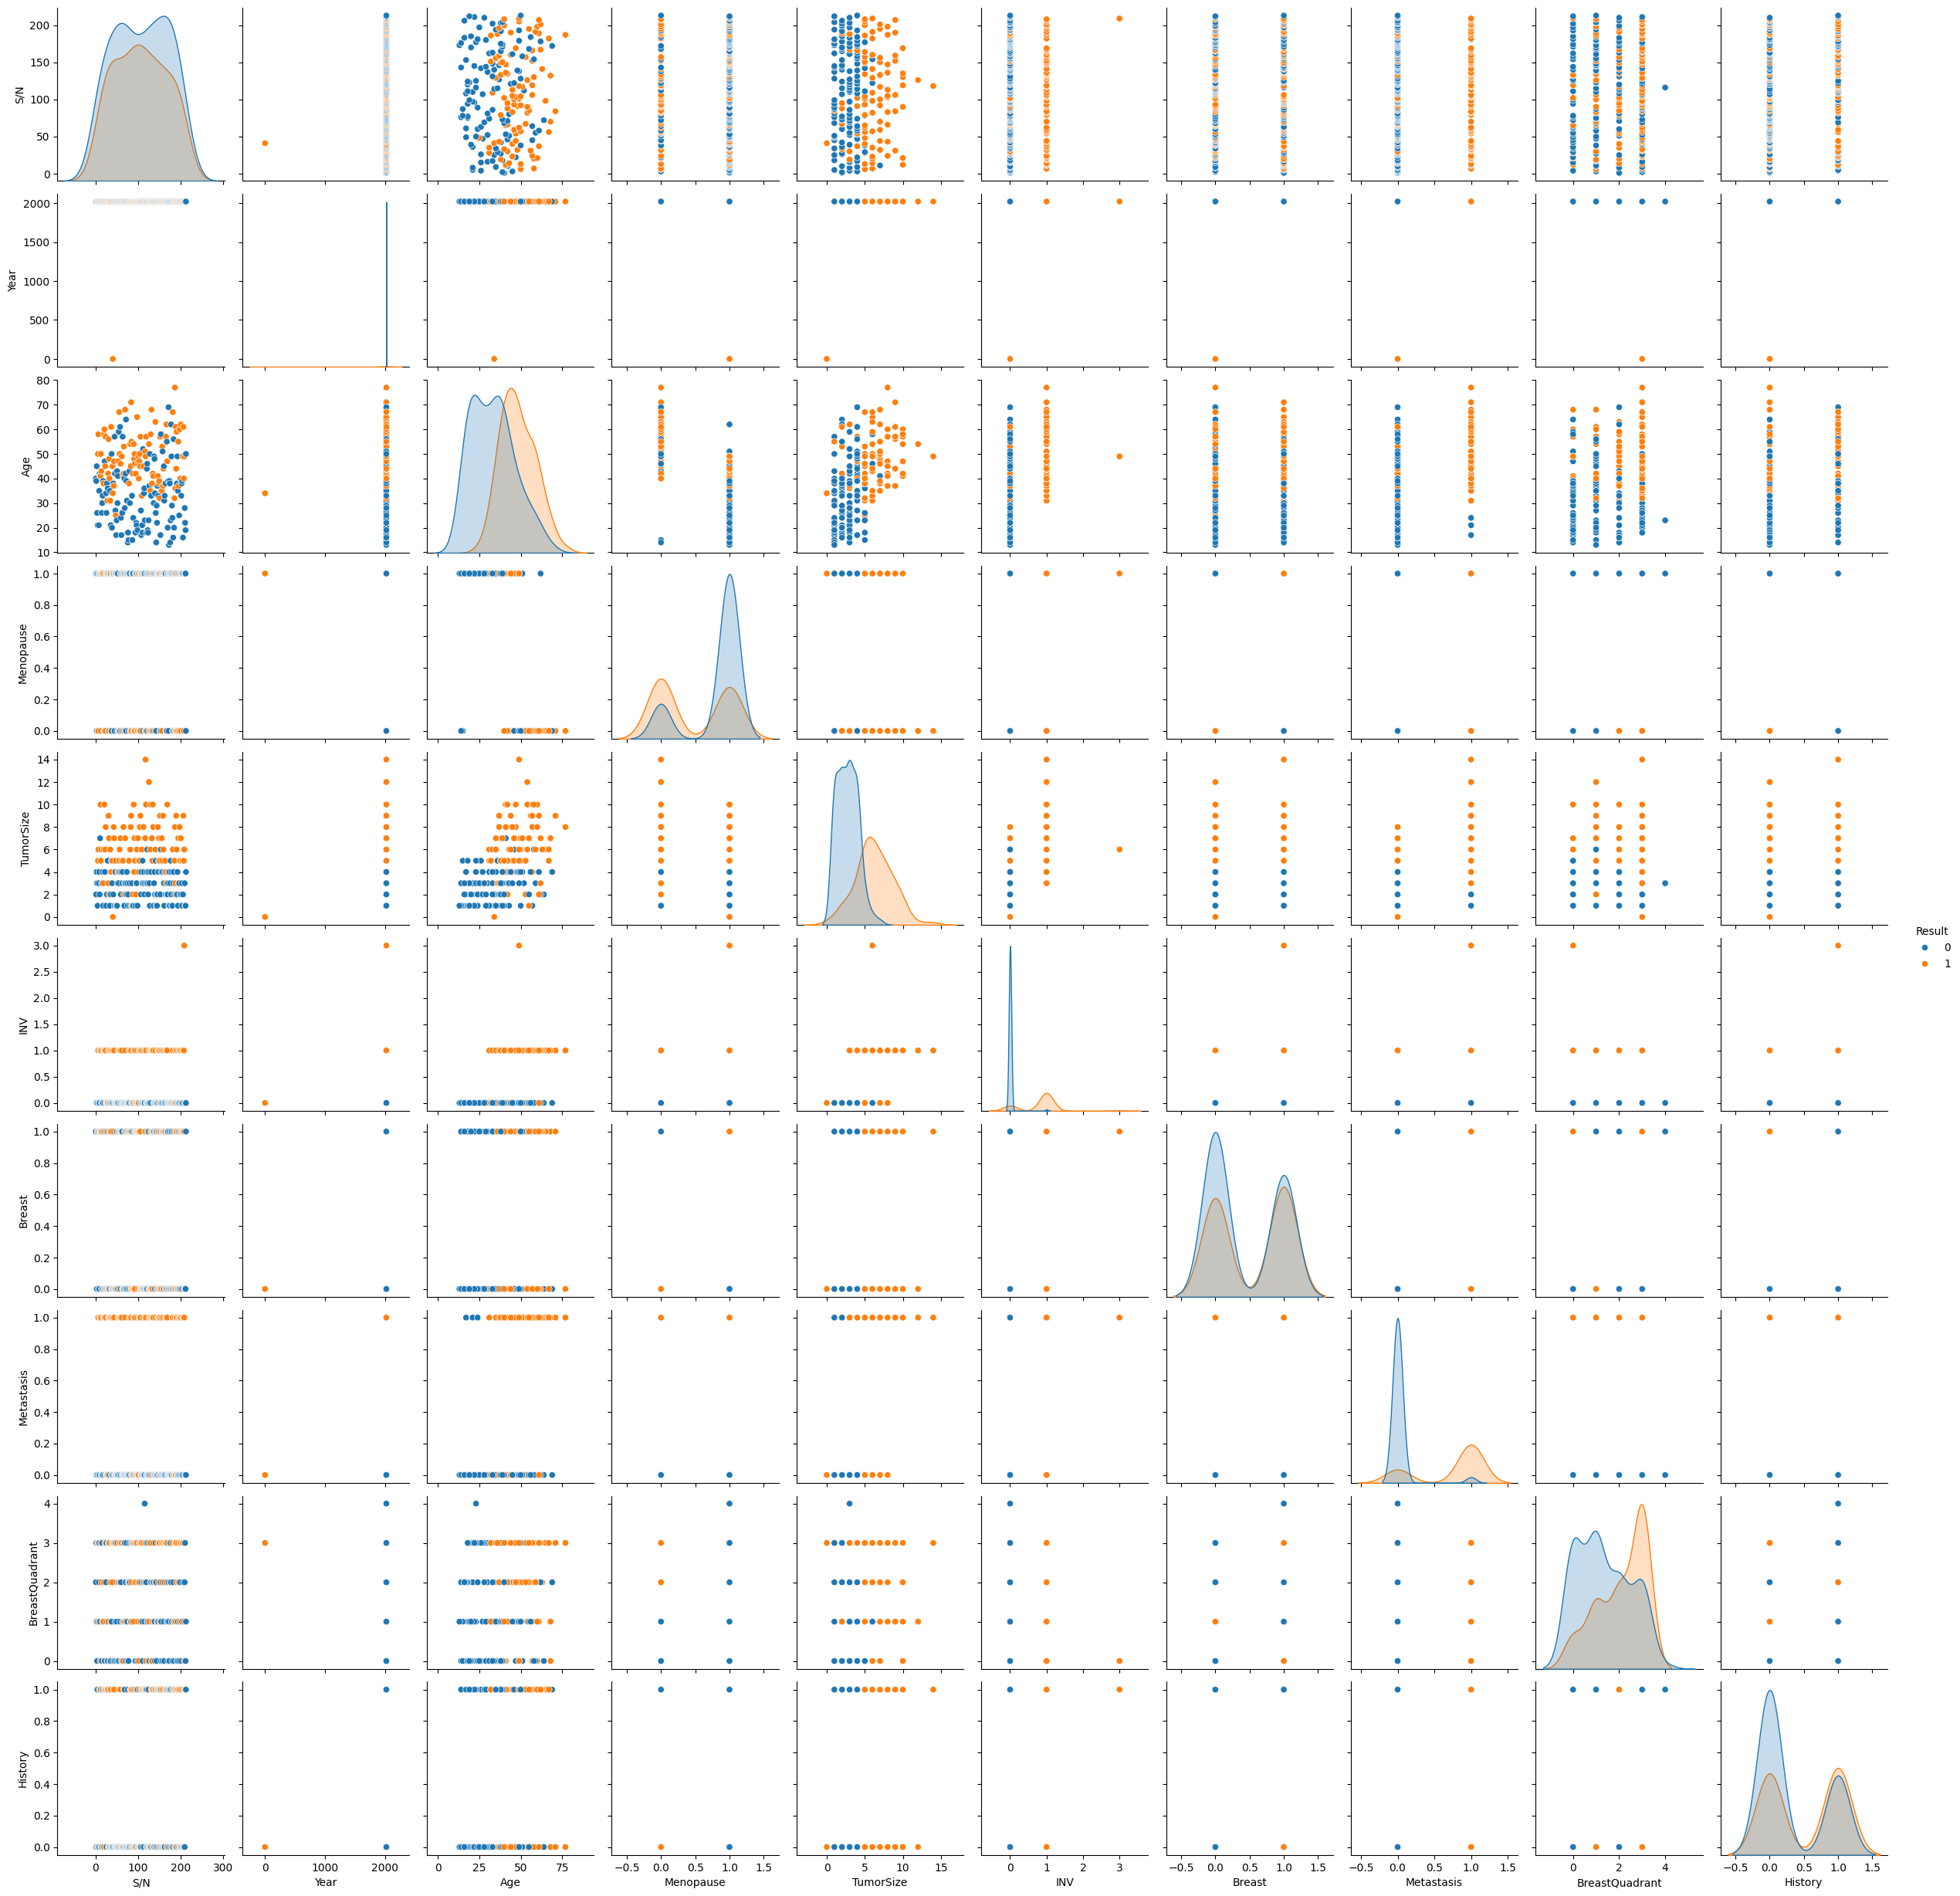

In [13]:
sns.pairplot(df,hue='Result')

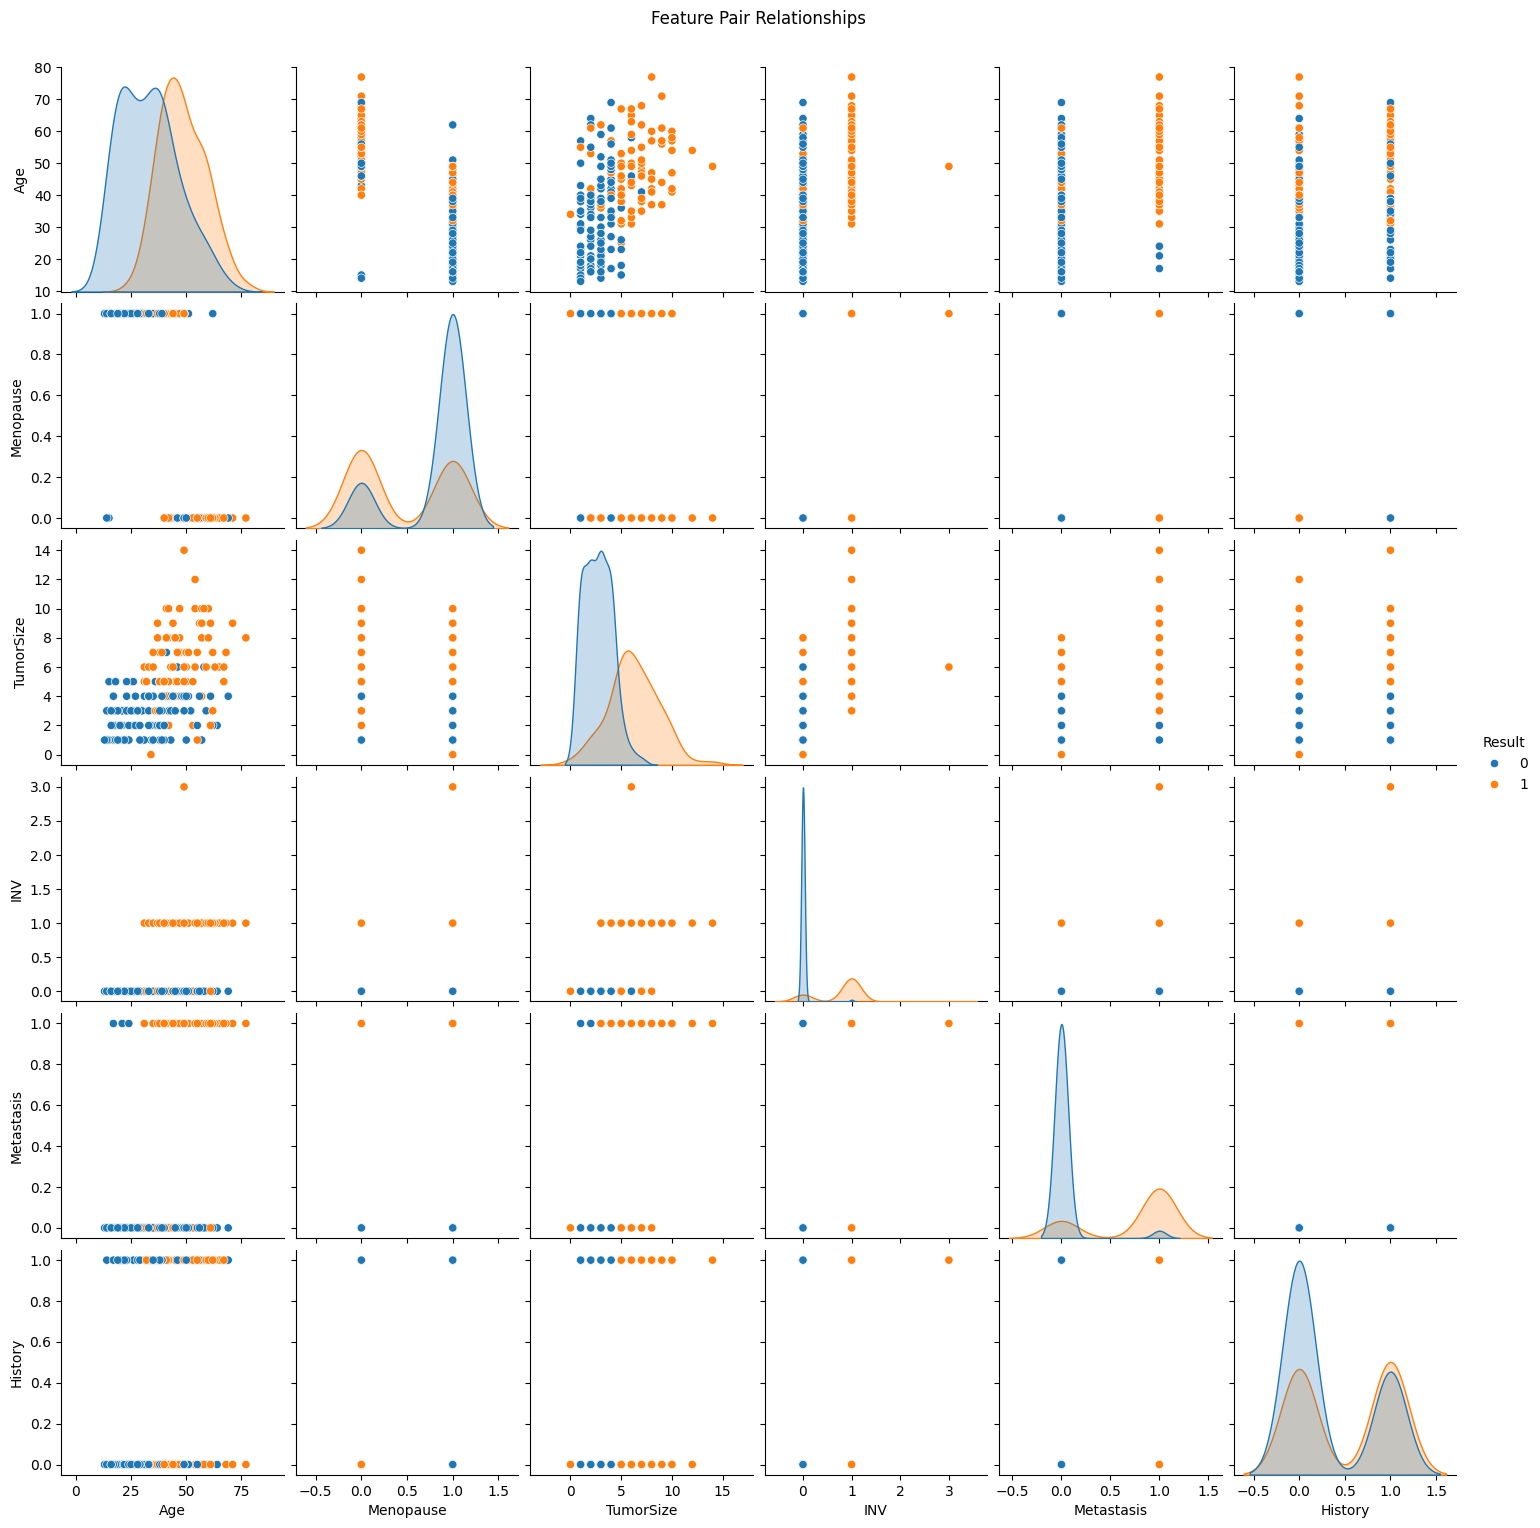

In [14]:
# Pairplot of numerical features
sns.pairplot(df[numerical_cols + ['Result']], hue='Result')
plt.suptitle('Feature Pair Relationships', y=1.02)
plt.show()

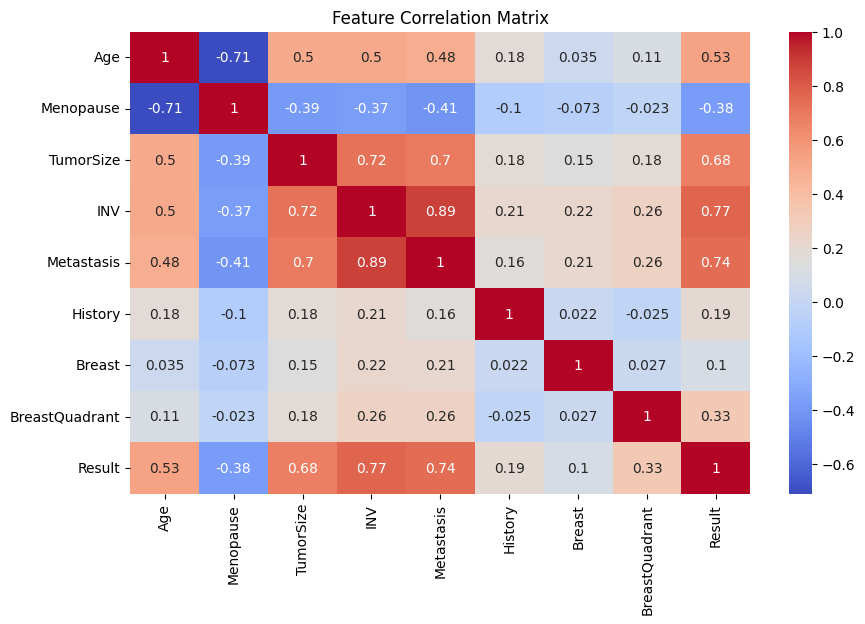

In [15]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + categorical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

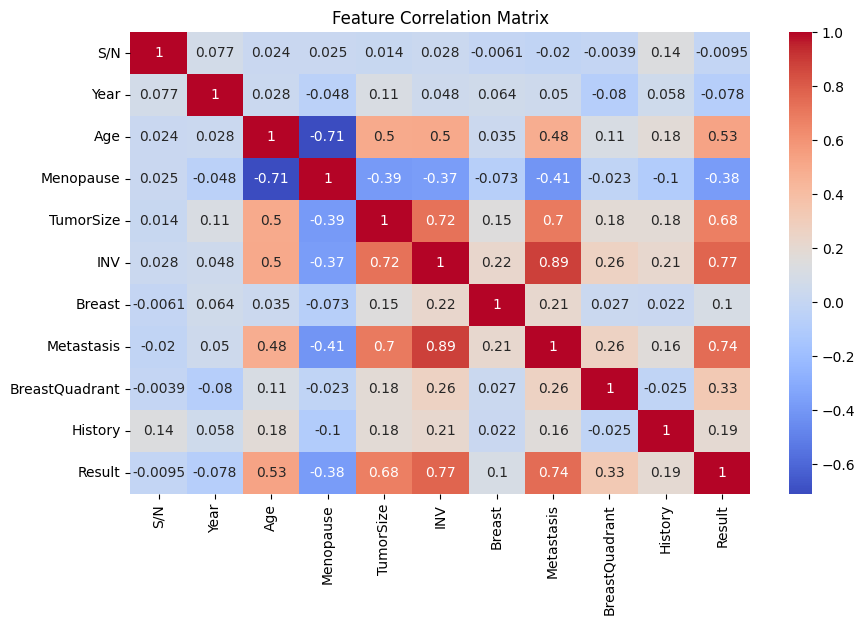

In [16]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Model Implementation & Evaluation

**Logistic Regression**<br>
**Decision Tree Classifier**<br>
**Random Forest**<br>
**Gaussian Naive Bayes**<br>
**Support Vector Machine**<br>
**Extra Tree Classifier(ETC)**<br>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [18]:
X = df.drop(['S/N', 'Year', 'Result'], axis=1)
y = df['Result']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
X

,Age,Menopause,TumorSize,INV,Breast,Metastasis,BreastQuadrant,History
0,40.0,1.0,2.0,0.0,1,0.0,2,0.0
1,39.0,1.0,2.0,0.0,0,0.0,3,0.0
2,45.0,0.0,4.0,0.0,0,0.0,1,0.0
3,26.0,1.0,3.0,0.0,0,0.0,0,1.0
4,21.0,1.0,1.0,0.0,1,0.0,3,1.0
...,...,...,...,...,...,...,...,...
208,49.0,1.0,6.0,3.0,1,1.0,0,1.0
209,28.0,1.0,3.0,0.0,0,0.0,2,0.0
210,22.0,1.0,1.0,0.0,0,0.0,3,1.0
211,19.0,1.0,1.0,0.0,0,0.0,0,1.0


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=500, random_state=42)
model_LR.fit(X_train, y_train)
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)
metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
    "Precision": [precision_score(y_train, y_train_pred, average='weighted'), precision_score(y_test, y_test_pred, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')]
}
metrics_df = pd.DataFrame(metrics, index=["Training", "Testing"])
metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.905882,0.910561,0.905882,0.904945
Testing,0.860465,0.860908,0.860465,0.858689


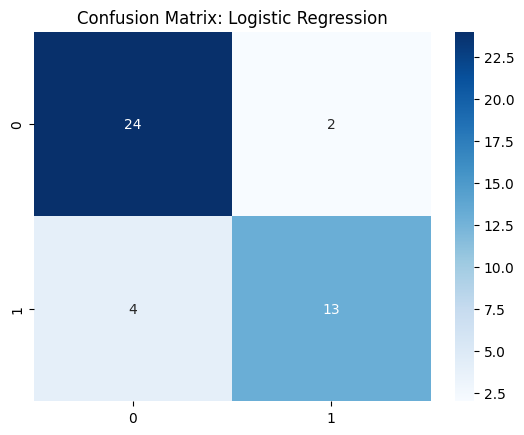

In [21]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

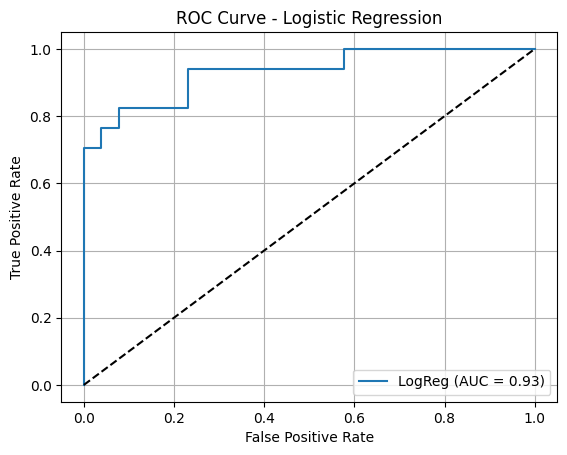

In [22]:
y_score = model_LR.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'LogReg (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_split=20,min_samples_leaf=5)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
dt_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_dt), accuracy_score(y_test, y_test_pred_dt)],
    "Precision": [precision_score(y_train, y_train_pred_dt, average='weighted'), precision_score(y_test, y_test_pred_dt, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_dt, average='weighted'), recall_score(y_test, y_test_pred_dt, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_dt, average='weighted'), f1_score(y_test, y_test_pred_dt, average='weighted')]
}
dt_metrics_df = pd.DataFrame(dt_metrics, index=["Training", "Testing"])
dt_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.905882,0.905882,0.905882,0.905882
Testing,0.883721,0.888361,0.883721,0.881266


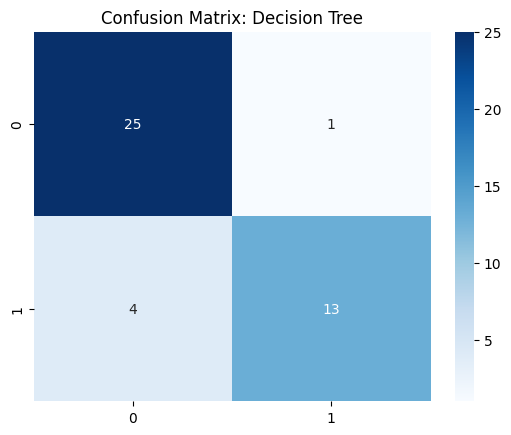

In [24]:
y_pred_dt = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Decision Tree")
plt.show()

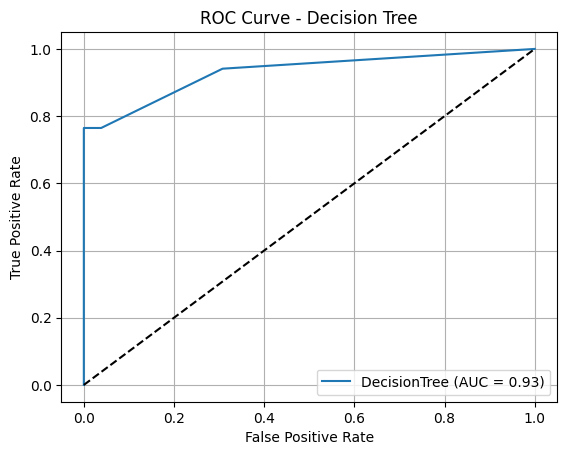

In [25]:
y_score = dt_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'DecisionTree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42,max_features='sqrt',max_samples=0.8,max_depth=10,min_samples_leaf=5)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
rf_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_rf), accuracy_score(y_test, y_test_pred_rf)],
    "Precision": [precision_score(y_train, y_train_pred_rf, average='weighted'), precision_score(y_test, y_test_pred_rf, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_rf, average='weighted'), recall_score(y_test, y_test_pred_rf, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_rf, average='weighted'), f1_score(y_test, y_test_pred_rf, average='weighted')]
}
rf_metrics_df = pd.DataFrame(rf_metrics, index=["Training", "Testing"])
rf_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.911765,0.917785,0.911765,0.910762
Testing,0.906977,0.919380,0.906977,0.904097


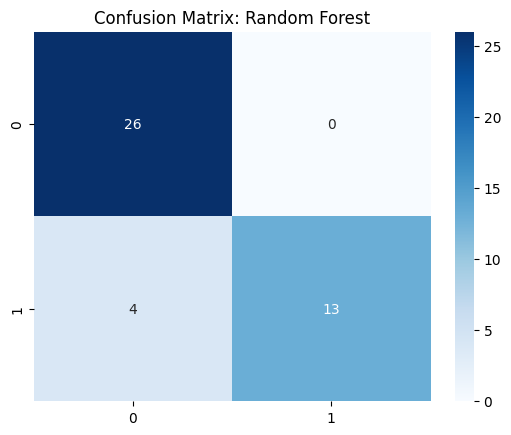

In [27]:
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Random Forest")
plt.show()

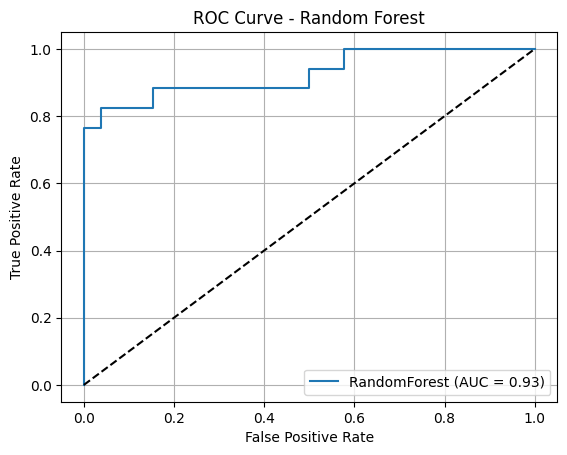

In [28]:
y_score = rf_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_train_pred_gnb = gnb_model.predict(X_train)
y_test_pred_gnb = gnb_model.predict(X_test)
gnb_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_gnb), accuracy_score(y_test, y_test_pred_gnb)],
    "Precision": [precision_score(y_train, y_train_pred_gnb, average='weighted'), precision_score(y_test, y_test_pred_gnb, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_gnb, average='weighted'), recall_score(y_test, y_test_pred_gnb, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_gnb, average='weighted'), f1_score(y_test, y_test_pred_gnb, average='weighted')]
}
gnb_metrics_df = pd.DataFrame(gnb_metrics, index=["Training", "Testing"])
gnb_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.894118,0.900798,0.894118,0.892756
Testing,0.883721,0.888361,0.883721,0.881266


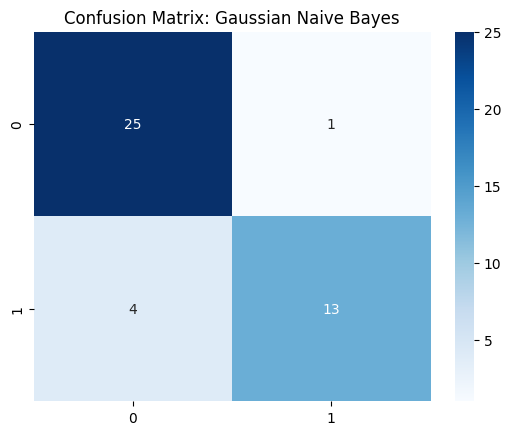

In [30]:
y_pred_gnb = gnb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Gaussian Naive Bayes")
plt.show()

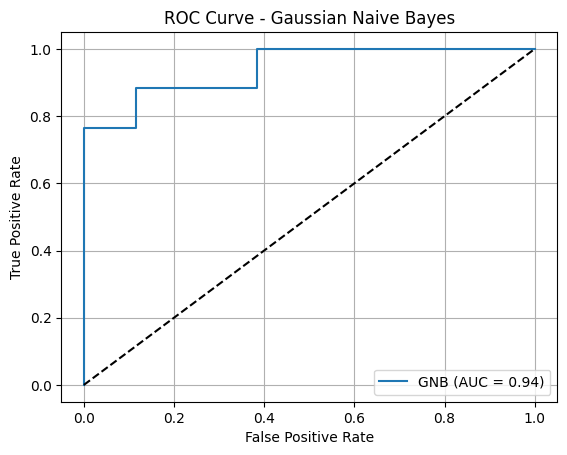

In [31]:
y_score = gnb_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'GNB (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Support Vector Machine

In [32]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)
svm_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_svm), accuracy_score(y_test, y_test_pred_svm)],
    "Precision": [precision_score(y_train, y_train_pred_svm, average='weighted'), precision_score(y_test, y_test_pred_svm, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_svm, average='weighted'), recall_score(y_test, y_test_pred_svm, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_svm, average='weighted'), f1_score(y_test, y_test_pred_svm, average='weighted')]
}
svm_metrics_df = pd.DataFrame(svm_metrics, index=["Training", "Testing"])
svm_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.905882,0.915992,0.905882,0.904370
Testing,0.906977,0.919380,0.906977,0.904097


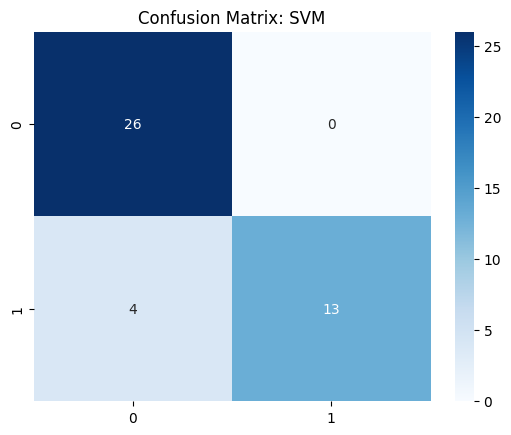

In [33]:
# Confusion Matrix
y_pred_svm = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: SVM")
plt.show()

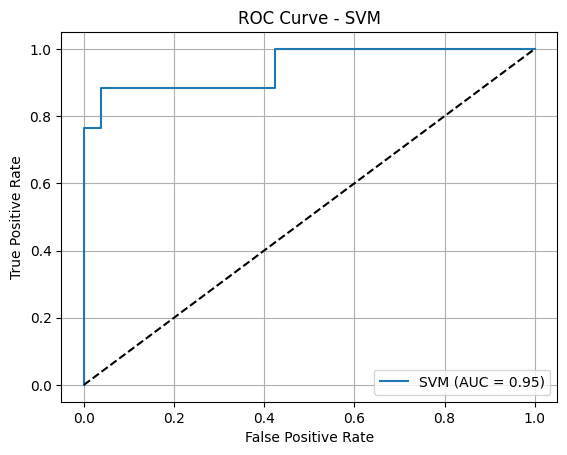

In [34]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)  
svm_model.fit(X_train, y_train)
y_score = svm_model.predict_proba(X_test)  # Works now!
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Extra Tree Classifier(ETC)

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier(n_estimators=200, random_state=42,max_features=0.3,max_depth=8,min_impurity_decrease=0.001)
etc_model.fit(X_train, y_train)
y_train_pred_etc = etc_model.predict(X_train)
y_test_pred_etc = etc_model.predict(X_test)
etc_metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred_etc), accuracy_score(y_test, y_test_pred_etc)],
    "Precision": [precision_score(y_train, y_train_pred_etc, average='weighted'), precision_score(y_test, y_test_pred_etc, average='weighted')],
    "Recall": [recall_score(y_train, y_train_pred_etc, average='weighted'), recall_score(y_test, y_test_pred_etc, average='weighted')],
    "F1-score": [f1_score(y_train, y_train_pred_etc, average='weighted'), f1_score(y_test, y_test_pred_etc, average='weighted')]
}
etc_metrics_df = pd.DataFrame(etc_metrics, index=["Training", "Testing"])
etc_metrics_df

,Accuracy,Precision,Recall,F1-score
Training,0.905882,0.915992,0.905882,0.904370
Testing,0.906977,0.919380,0.906977,0.904097


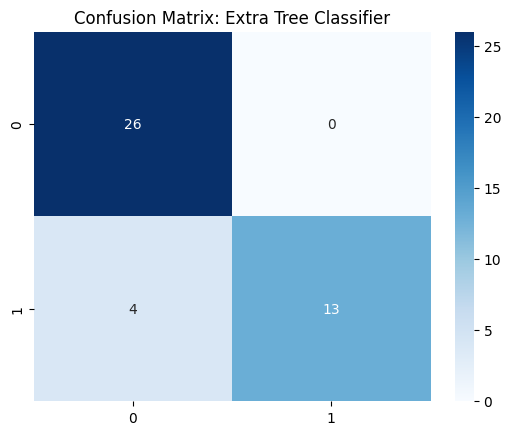

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_etc)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Extra Tree Classifier")
plt.show()

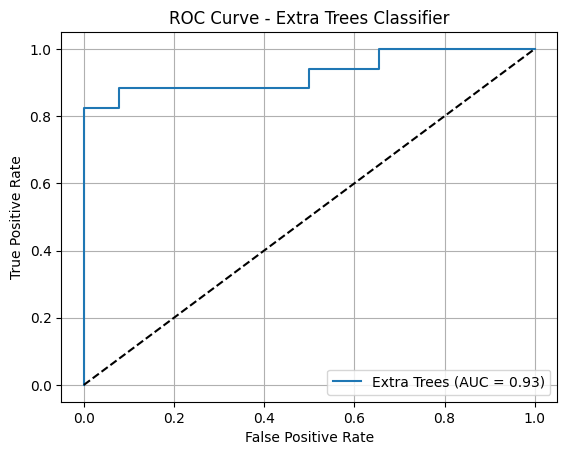

In [37]:
y_score = etc_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Extra Trees (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Extra Trees Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Comparison Table

In [38]:
comparison_data = {
    "Model": [
        "Extra Tree Classifier (ETC)",
        "Logistic Regression",
        "Decision Tree Classifier",
        "Random Forest",
        "Gaussian Naive Bayes",
        "Support Vector Machine (SVM)"
    ],
    "Training Accuracy": [
        etc_metrics_df.loc["Training", "Accuracy"],
        metrics_df.loc["Training", "Accuracy"],
        dt_metrics_df.loc["Training", "Accuracy"],
        rf_metrics_df.loc["Training", "Accuracy"],
        gnb_metrics_df.loc["Training", "Accuracy"],
        svm_metrics_df.loc["Training", "Accuracy"]
    ],
    "Testing Accuracy": [
        etc_metrics_df.loc["Testing", "Accuracy"],
        metrics_df.loc["Testing", "Accuracy"],
        dt_metrics_df.loc["Testing", "Accuracy"],
        rf_metrics_df.loc["Testing", "Accuracy"],
        gnb_metrics_df.loc["Testing", "Accuracy"],
        svm_metrics_df.loc["Testing", "Accuracy"]
    ],
    "Training Precision": [
        etc_metrics_df.loc["Training", "Precision"],
        metrics_df.loc["Training", "Precision"],
        dt_metrics_df.loc["Training", "Precision"],
        rf_metrics_df.loc["Training", "Precision"],
        gnb_metrics_df.loc["Training", "Precision"],
        svm_metrics_df.loc["Training", "Precision"]
    ],
    "Testing Precision": [
        etc_metrics_df.loc["Testing", "Precision"],
        metrics_df.loc["Testing", "Precision"],
        dt_metrics_df.loc["Testing", "Precision"],
        rf_metrics_df.loc["Testing", "Precision"],
        gnb_metrics_df.loc["Testing", "Precision"],
        svm_metrics_df.loc["Testing", "Precision"]
    ],
    "Training Recall": [
        etc_metrics_df.loc["Training", "Recall"],
        metrics_df.loc["Training", "Recall"],
        dt_metrics_df.loc["Training", "Recall"],
        rf_metrics_df.loc["Training", "Recall"],
        gnb_metrics_df.loc["Training", "Recall"],
        svm_metrics_df.loc["Training", "Recall"]
    ],
    "Testing Recall": [
        etc_metrics_df.loc["Testing", "Recall"],
        metrics_df.loc["Testing", "Recall"],
        dt_metrics_df.loc["Testing", "Recall"],
        rf_metrics_df.loc["Testing", "Recall"],
        gnb_metrics_df.loc["Testing", "Recall"],
        svm_metrics_df.loc["Testing", "Recall"]
    ],
    "Training F1-score": [
        etc_metrics_df.loc["Training", "F1-score"],
        metrics_df.loc["Training", "F1-score"],
        dt_metrics_df.loc["Training", "F1-score"],
        rf_metrics_df.loc["Training", "F1-score"],
        gnb_metrics_df.loc["Training", "F1-score"],
        svm_metrics_df.loc["Training", "F1-score"]
    ],
    "Testing F1-score": [
        etc_metrics_df.loc["Testing", "F1-score"],
        metrics_df.loc["Testing", "F1-score"],
        dt_metrics_df.loc["Testing", "F1-score"],
        rf_metrics_df.loc["Testing", "F1-score"],
        gnb_metrics_df.loc["Testing", "F1-score"],
        svm_metrics_df.loc["Testing", "F1-score"]
    ]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index("Model", inplace=True)
print("Comparison Table for Training and Testing Performance of All Models:")
comparison_df

Comparison Table for Training and Testing Performance of All Models:


,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1-score,Testing F1-score
Model,,,,,,,,
Extra Tree Classifier (ETC),0.905882,0.906977,0.915992,0.919380,0.905882,0.906977,0.904370,0.904097
Logistic Regression,0.905882,0.860465,0.910561,0.860908,0.905882,0.860465,0.904945,0.858689
Decision Tree Classifier,0.905882,0.883721,0.905882,0.888361,0.905882,0.883721,0.905882,0.881266
Random Forest,0.911765,0.906977,0.917785,0.919380,0.911765,0.906977,0.910762,0.904097
Gaussian Naive Bayes,0.894118,0.883721,0.900798,0.888361,0.894118,0.883721,0.892756,0.881266
Support Vector Machine (SVM),0.905882,0.906977,0.915992,0.919380,0.905882,0.906977,0.904370,0.904097


## Comparison Graph

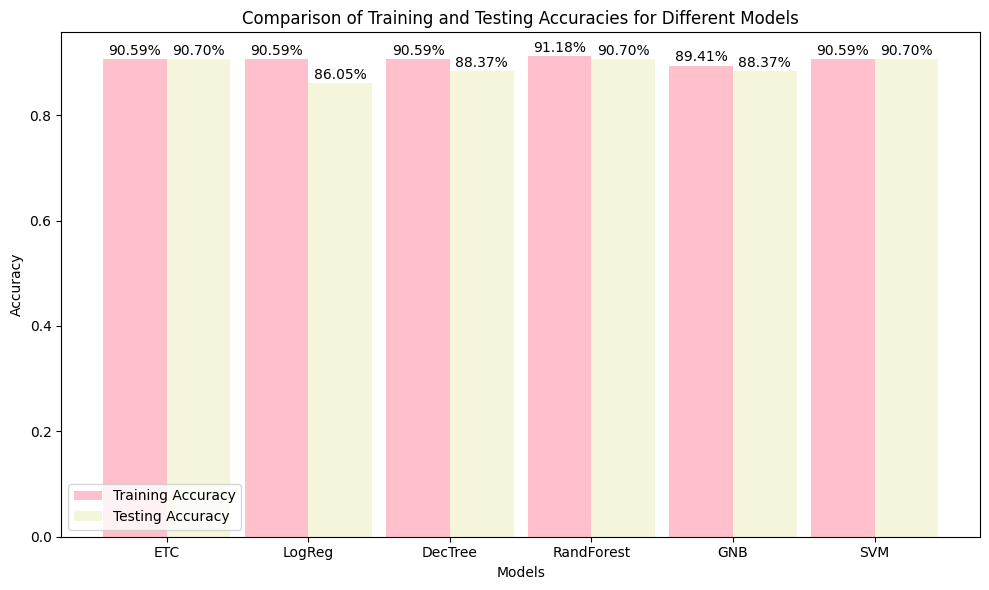

In [39]:
models = [
    "ETC", "LogReg", "DecTree", "RandForest", "GNB", "SVM"
]
training_accuracies = [
    etc_metrics_df.loc["Training", "Accuracy"],
    metrics_df.loc["Training", "Accuracy"],
    dt_metrics_df.loc["Training", "Accuracy"],
    rf_metrics_df.loc["Training", "Accuracy"],
    gnb_metrics_df.loc["Training", "Accuracy"],
    svm_metrics_df.loc["Training", "Accuracy"]
]
testing_accuracies = [
    etc_metrics_df.loc["Testing", "Accuracy"],
    metrics_df.loc["Testing", "Accuracy"],
    dt_metrics_df.loc["Testing", "Accuracy"],
    rf_metrics_df.loc["Testing", "Accuracy"],
    gnb_metrics_df.loc["Testing", "Accuracy"],
    svm_metrics_df.loc["Testing", "Accuracy"]
]
x = range(len(models))
width = 0.45
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar([i - width / 2 for i in x], training_accuracies, width, label='Training Accuracy', color='pink')
bar2 = ax.bar([i + width / 2 for i in x], testing_accuracies, width, label='Testing Accuracy', color='beige')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracies for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**From the above we comparasion, we can say that "Random Forest", "Extra Tree Classifier" and "SVM" are giving highest accuracy of 90.6977% as testing accuracy**

In [40]:
# Cross-Validation Scores
from sklearn.model_selection import cross_val_score

for model in [rf_model, etc_model,svm_model]:
    scores = cross_val_score(model, X, y, cv=7)
    print(f"{model.__class__.__name__}: Mean={scores.mean():.4f}, Std={scores.std():.4f}")

RandomForestClassifier: Mean=0.8972, Std=0.0528
ExtraTreesClassifier: Mean=0.8971, Std=0.0532
SVC: Mean=0.7888, Std=0.0453


### Random Forest
It has the **highest mean accuracy** and **lowest standard deviation**, which is the primary performance indicator.<br>
It offers **robustness, scalability, and feature importance**, which are beneficial for debugging and interpretability.<br>

## Fine Tune Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = rf_model

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Run grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=7, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Fitting 7 folds for each of 216 candidates, totalling 1512 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated score: 0.9114285714285713


## Feature Importance

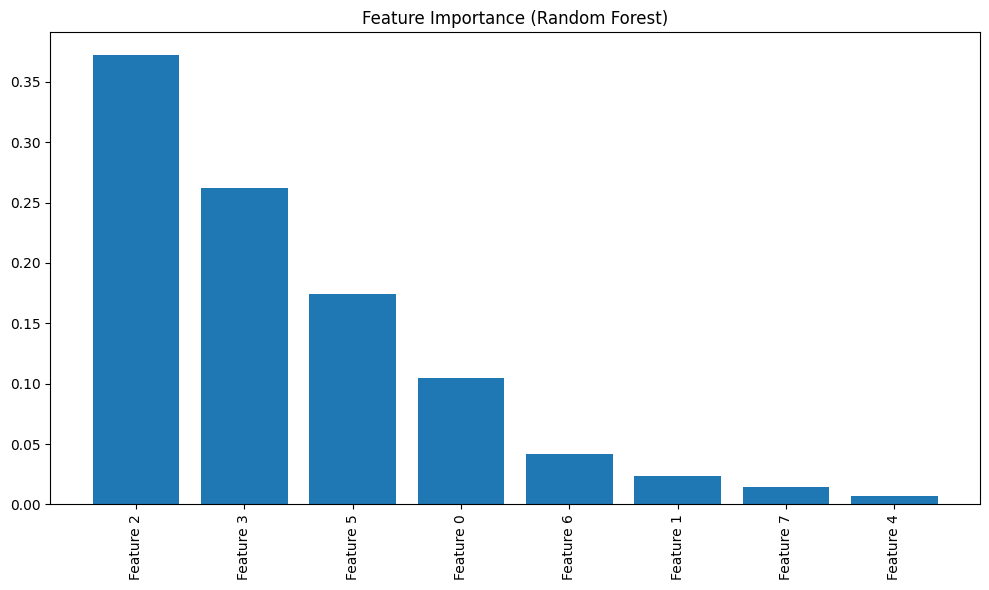

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Best model from grid search
best_rf = grid_search.best_estimator_

# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Optionally: get feature names
try:
    feature_names = X_train.columns
except:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## Prediction

In [43]:
import pickle
with open('randomforestModel.pkl','wb') as file:
    pickle.dump(rf,file)

In [44]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [45]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [46]:
label_encoders

{'Breast': LabelEncoder(),
 'BreastQuadrant': LabelEncoder(),
 'Result': LabelEncoder()}

In [47]:
import joblib
import pandas as pd

model = joblib.load('randomforestModel.pkl') 
scaler = joblib.load('scaler.pkl')
"""
Encoding for column: Breast
0: Left
1: Right


Encoding for column: BreastQuadrant
0: Lower inner
1: Lower outer
2: Upper inner
3: Upper outer
4: Upper outer 


Encoding for column: Result
0: Benign
1: Malignant
"""
def predict_cancer():
    print("\nEnter patient details:")
    features = [
        int(input("Age: ")),
        int(input("Menopause: ")),#binary
        int(input("Tumor Size (cm): ")),
        int(input("INV: ")),
        int(input("Breast: (encoded)")),#Object-binary-0,1
        int(input("Metastasis: (encoded)")),#binary
        int(input("Breast Quadrant: (encoded)")),#Object-0,1,2,3
        int(input("History: "))#binary
    ]
    input_data = pd.DataFrame([features], columns=[
        'Age', 'Menopause', 'TumorSize', 'INV', 'Breast', 'Metastasis', 'BreastQuadrant','History'
    ])
    scaled_input = scaler.transform(input_data)
    predicted_label = model.predict(scaled_input)[0]

    if predicted_label == 0:
        print("Benign")
    elif predicted_label == 1:
        print("Malignant")
while True:
    predict_cancer()
    if input("\nPredict again? (y/n): ").lower() != 'y':
        break


Enter patient details:


Age:  40
Menopause:  1
Tumor Size (cm):  3
INV:  1
Breast: (encoded) 1
Metastasis: (encoded) 0
Breast Quadrant: (encoded) 2
History:  0


Benign



Predict again? (y/n):  n


## Medical Terms and its meaning
**Benign:-** Benign breast lumps are non-cancerous growths that do not spread outside the breast<br>
**Malignant:-** Malignant breast tumors are cancerous and can spread to other parts of the body